# Visualizing data with python

**Author:** Ties de Kok ([Personal Website](https://www.tiesdekok.com))  
**Last updated:** June 2020  
**Conda Environment:** `LearnPythonForResearch`  
**Python version:** Python 3.7   
**Pandas version:** Pandas 1.0.4  
**License:** MIT License  

**Note:** Some features (like the ToC) will only work if you run it locally, use Binder, or use nbviewer by clicking this link: 
https://nbviewer.jupyter.org/github/TiesdeKok/LearnPythonforResearch/blob/master/3_visualizing_data.ipynb

# *Introduction*

There are many ways to create data visualizations in Python. Too many to cover in this notebook, but I will show several libraries that I've used in the past. 

# *Table of Contents* <a id='toc'></a>

* [Quick visualizations using Pandas](#pandas)   
* [Make visualizations using the Seaborn package](#seaborn)
* [Visualizations using plotnine (for those that are familiar with ggplot2 from R](#plotnine)  
* [Interactive visualizations with Bokeh](#bokeh)   

## Imports

**Note:** If we want our visualizations to appear in the notebook we need to add this to the beginning of our notebook:

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


As a starting point we will use data that is stored as a Pandas dataframe/series or a Numpy array.

In [2]:
import os
import pandas as pd
import numpy as np

Many packages use matplotlib in the background so it is usually worth it to import that as well

In [3]:
import matplotlib.pyplot as plt

### Parameters

In [4]:
data_path = os.path.join(os.getcwd(), 'example_data')

### Load some example data

For details on opening files such as Excel, CSV, Stata, SAS, HDF see the `1_opening_files` notebook.

In [5]:
df_auto = pd.read_csv(os.path.join(data_path, 'auto_df.csv'), sep=';', index_col='Unnamed: 0')

----
## <span style="text-decoration: underline;">Quick visualizations using Pandas and Matplotlib</span><a id='pandas'></a> [(to top)](#toc)

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html  

Pandas comes with basic functionality to visualize data in Pandas DataFrames. It uses `matplotlib` in the background. 

You can create nice visualization using these basic fucntions, but it does require you to transform the data to the direct input for a graph yourself. 

The `Seaborn` package is sometimes easier as it can take care of some of this transforming for you. 

### Bar plot

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#bar-plots

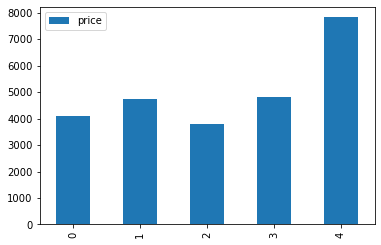

In [6]:
df_auto.iloc[0:5][['price']].plot.bar()

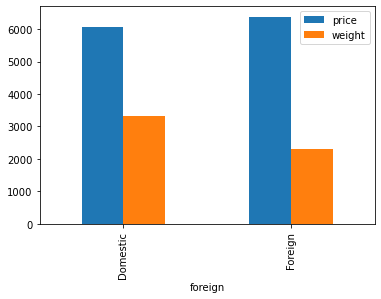

In [7]:
df_auto.groupby(['foreign']).mean()[['price', 'weight']].plot.bar()

### Histogram

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#histograms

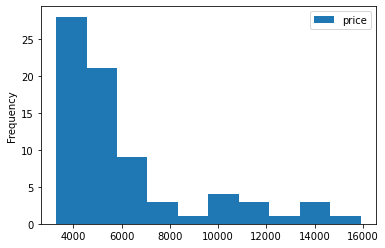

In [8]:
df_auto[['price']].plot.hist()

### Box plots

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#box-plots

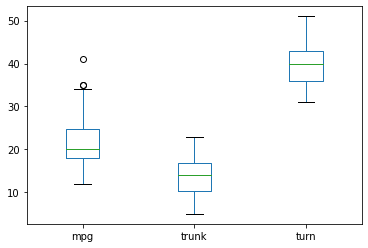

In [9]:
df_auto[['mpg', 'trunk', 'turn']].plot.box()

### Scatter plot

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#scatter-plot

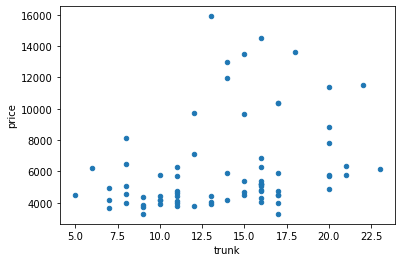

In [10]:
df_auto.plot.scatter(x='trunk', y='price')

### Pie plot

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#pie-plot

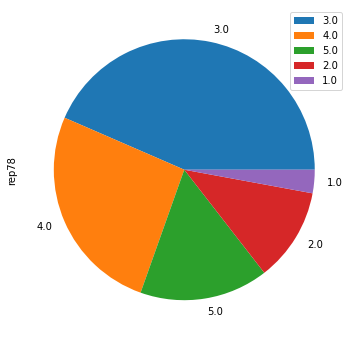

In [11]:
df_auto['rep78'].value_counts().plot.pie(figsize=(6, 6), legend=True)

### Create a visualization on a random series (from docs)

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#basic-plotting-plot

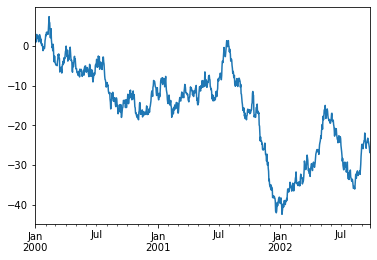

In [12]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

----
## <span style="text-decoration: underline;">Make visualizations[(to top)](#toc) using the `Seaborn` package</span><a id='seaborn'></a> [(to top)](#toc)

`Seaborn` is a great package to create visualizations for Pandas dataframes:  
> https://seaborn.pydata.org/index.html

The main benefit of Seaborn is that it takes care of some of the transformation steps for you. Plus it has some additional features to make your graphs more aesthetically pleasing. 

In [13]:
import seaborn as sns

## Change the look of your Seaborn visualizations

### Set the style

Seaborn comes with a variety of build-in themes: `darkgrid`, `whitegrid`, `dark`, `white`, and `ticks`.    

https://seaborn.pydata.org/tutorial/aesthetics.html#seaborn-figure-styles

This function (from the documentation) creates some random data to show the different styles:

In [14]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

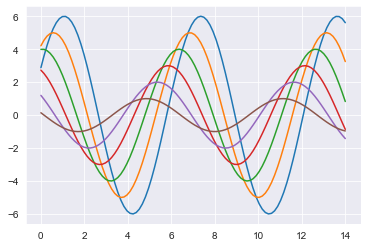

In [15]:
sns.set_style("darkgrid")
sinplot()

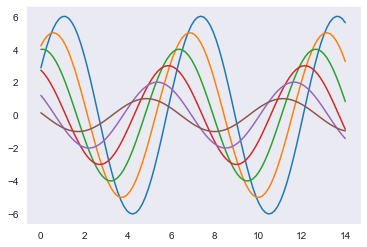

In [16]:
sns.set_style("dark")
sinplot()

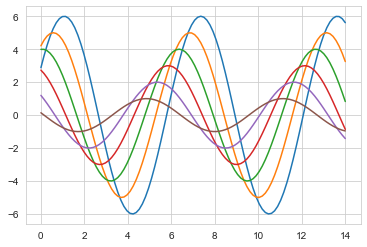

In [17]:
sns.set_style("whitegrid")
sinplot()

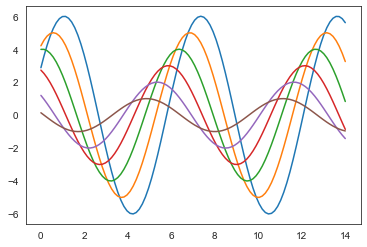

In [18]:
sns.set_style("white")
sinplot()

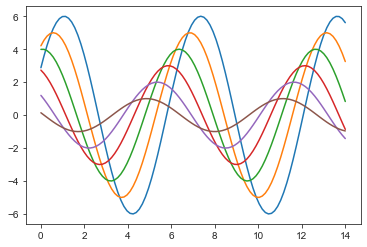

In [19]:
sns.set_style("ticks")
sinplot()

It is also possible to remove the 'spine' by using `sns.despine()`:

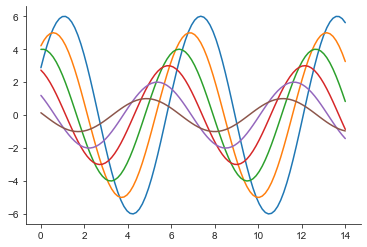

In [20]:
sinplot()
sns.despine()

### Set the colors

Colors can make a big difference when it comes to the appearance of a visual.  See the details here:  
https://seaborn.pydata.org/tutorial/color_palettes.html

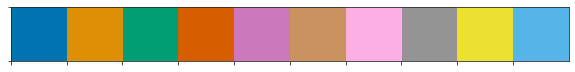

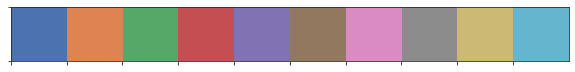

In [21]:
colorblind_palette = sns.color_palette('colorblind')
deep_palette = sns.color_palette('deep')

sns.palplot(colorblind_palette)
sns.palplot(deep_palette)

You can pass these color palettes to your plotting function. 

## Several Seaborn examples

### Histogram

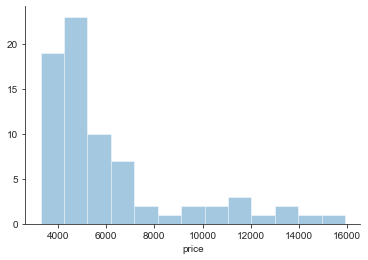

In [22]:
sns.distplot(df_auto['price'], kde=False)
sns.despine()

### Scatterplot

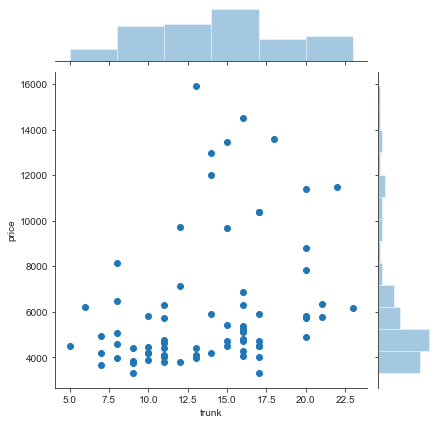

In [23]:
sns.jointplot(x="trunk", y="price", data=df_auto)

### Pairwise correlations

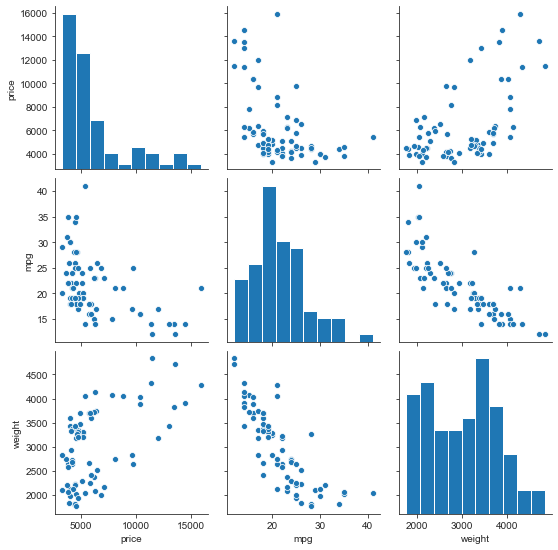

In [24]:
sns.pairplot(df_auto[['price', 'mpg', 'weight']])

### Plotting categorical data

Let's create some categorical columns:

In [25]:
df_auto['brand'] = [x.split(" ")[0] for x in df_auto['make']]
df_auto['headroom'] = ['big' if x > 2.5 else 'small' for x in df_auto['headroom']]
df_auto['weight_cat'] = pd.qcut(df_auto['weight'].values, 12, labels=range(0,12))

In [26]:
df_auto.head()

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign,brand,weight_cat
0,AMC Concord,4099,22,3.0,small,11,2930,186,40,121,3.58,Domestic,AMC,5
1,AMC Pacer,4749,17,3.0,big,11,3350,173,40,258,2.53,Domestic,AMC,7
2,AMC Spirit,3799,22,NaN,big,12,2640,168,35,121,3.08,Domestic,AMC,3
3,Buick Century,4816,20,3.0,big,16,3250,196,40,196,2.93,Domestic,Buick,6
4,Buick Electra,7827,15,4.0,big,20,4080,222,43,350,2.41,Domestic,Buick,11


### Bar plot

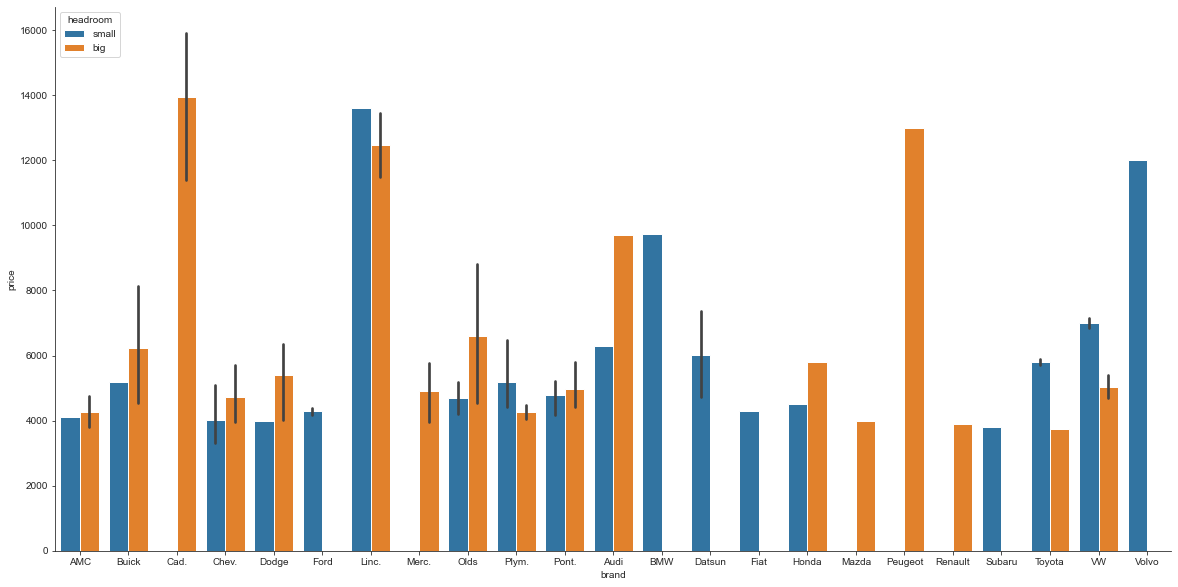

In [27]:
plt.figure(figsize=(20,10))
sns.barplot(x="brand", y="price", hue="headroom", data=df_auto)
sns.despine()

*Note:* we could pass our colorblind palette to this plot for example:

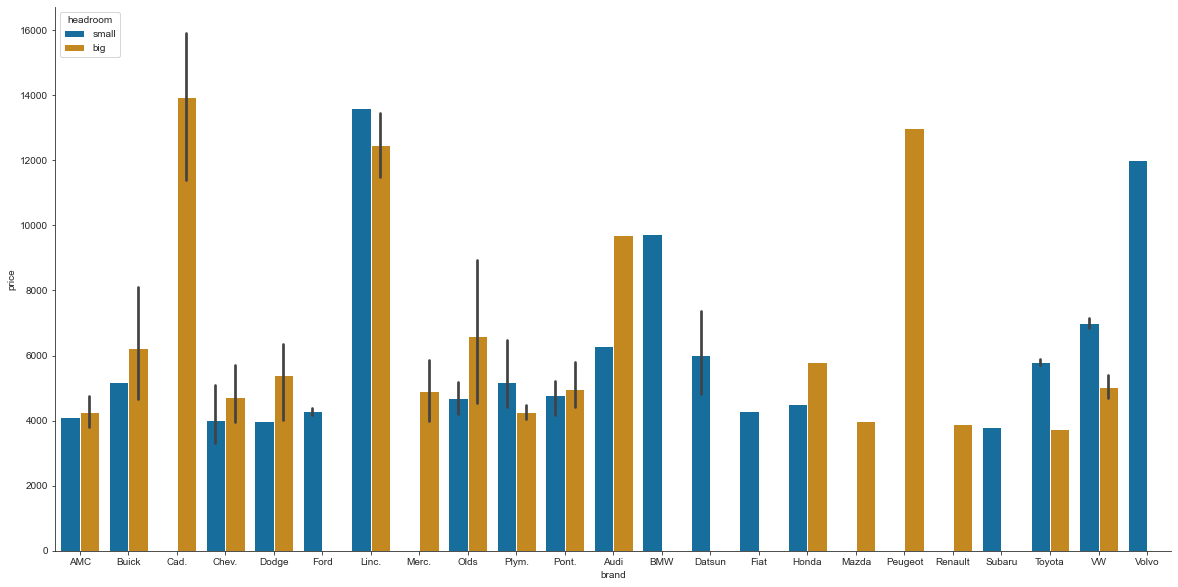

In [28]:
plt.figure(figsize=(20,10))
sns.barplot(x="brand", y="price", hue="headroom", data=df_auto, palette=colorblind_palette)
sns.despine()

### Count plot

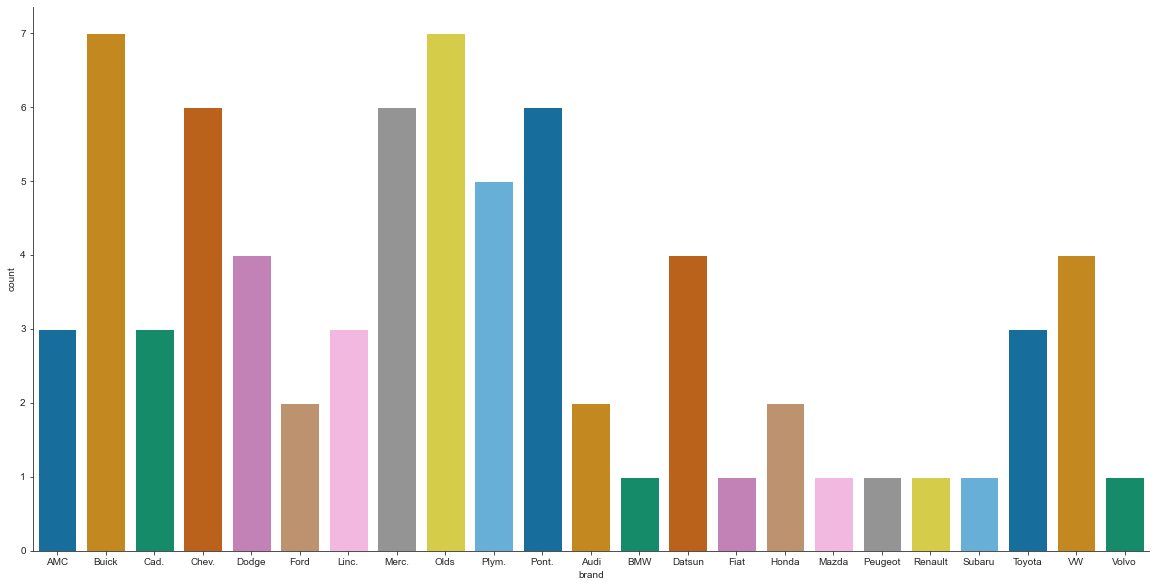

In [29]:
plt.figure(figsize=(20,10))
sns.countplot(x="brand", data=df_auto, palette=colorblind_palette)
sns.despine()

### Point plot

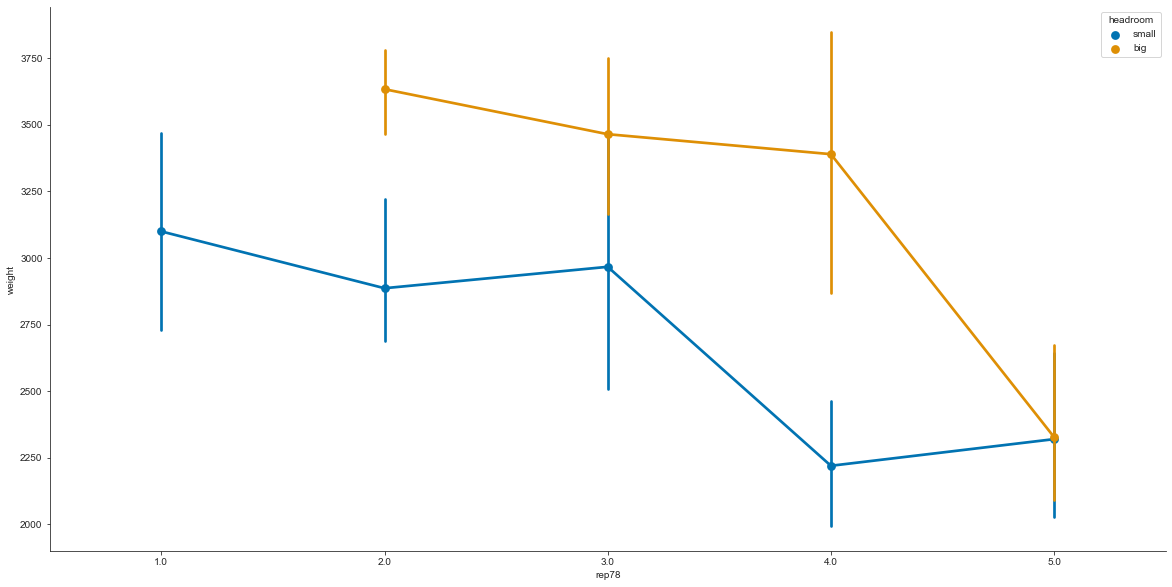

In [30]:
plt.figure(figsize=(20,10))
sns.pointplot(x="rep78", y="weight", hue='headroom',data=df_auto, palette=colorblind_palette)
sns.despine()

## Seaborn Grids

A powerful feature of `Seaborn` is the ability to create a grid of visualization with multiple graphs.  
https://seaborn.pydata.org/tutorial/axis_grids.html

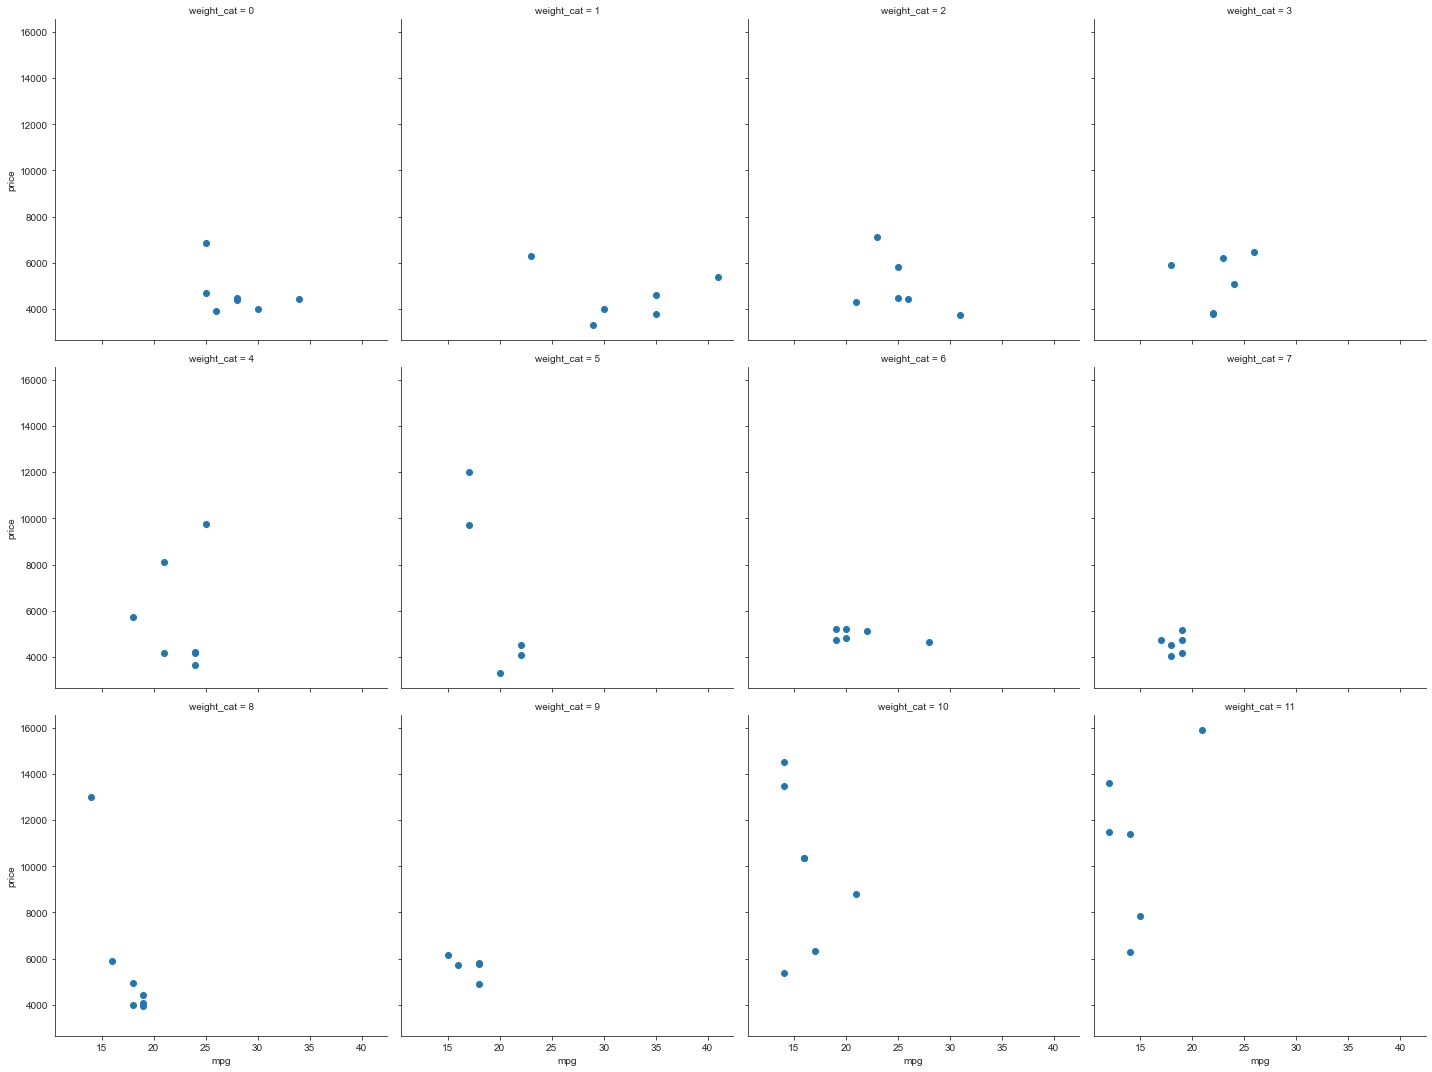

In [31]:
g = sns.FacetGrid(df_auto, col="weight_cat", col_wrap=4, height=5)
g.map(plt.scatter,"mpg", "price")

----
## <span style="text-decoration: underline;">R like visualization with `plotnine`</span><a id='plotnine'></a> [(to top)](#toc)

The `plotnine`  library is an implementation of the "grammar of graphics" and is based on the R library `ggplot2`.     

https://github.com/has2k1/plotnine

In [32]:
import plotnine
from plotnine import ggplot, geom_bar, geom_boxplot, geom_point, aes

### Bar chart example  
https://plotnine.readthedocs.io/en/latest/generated/plotnine.geoms.geom_bar.html#bar-chart

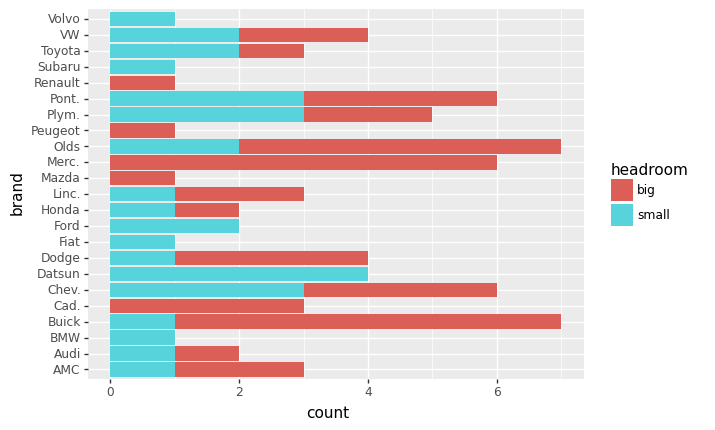

<ggplot: (-9223371895922031700)>

In [33]:
(
    ggplot(df_auto) 
    + geom_bar(aes(x='brand', fill='headroom'))
    + plotnine.coord_flip()
)

### Boxplot example

https://plotnine.readthedocs.io/en/latest/generated/plotnine.geoms.geom_boxplot.html#a-box-and-whiskers-plot

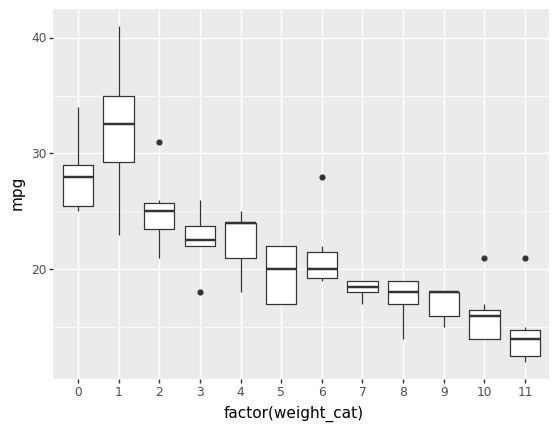

<ggplot: (-9223371895919896504)>

In [34]:
(
  ggplot(df_auto) 
  + geom_boxplot(aes(x='factor(weight_cat)', y = 'mpg'))  
)

### Plot with facets example

https://plotnine.readthedocs.io/en/latest/index.html

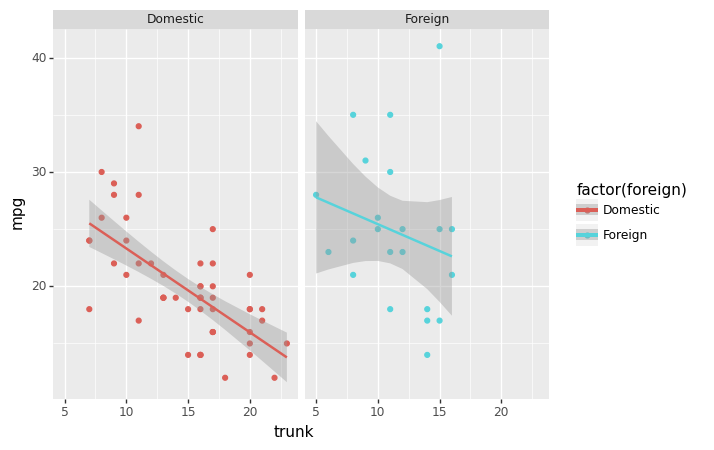

<ggplot: (-9223371895919759164)>

In [35]:
(
  ggplot(df_auto, aes('trunk', 'mpg', color='factor(foreign)')) 
  + geom_point()
  + plotnine.stat_smooth(method='lm')
  + plotnine.facet_wrap('~foreign')
)

----
## <span style="text-decoration: underline;">Interactive visualizations with `Bokeh`</span><a id='bokeh'></a> [(to top)](#toc)

A great library to create interactive visualizations from Pandas DataFrames is `Bokeh`: http://bokeh.pydata.org/en/latest/

For the extensive documentation see: https://docs.bokeh.org/en/latest/

**Note:** These graphs will not show on GitHub. Some plots will show if you show them via `nbviewer`:  
https://nbviewer.jupyter.org/github/TiesdeKok/PythonAccountingResearch/blob/master/3_visualizing_data.ipynb

In [36]:
import bokeh

In [37]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, show

In [38]:
output_notebook()

Loading BokehJS ...

### Bar chart

In [39]:
p = figure(plot_width=600, plot_height=400, title="Average MPG by Weight")
p.vbar(x='weight_cat', top='mpg', width=0.5, source=df_auto)
p.yaxis.axis_label = 'Average mpg'
p.xaxis.axis_label = 'Weight category'
show(p)

### Simple scatter plot

In [40]:
p = figure(plot_width=600, plot_height=400, title="Length vs Trunk")
p.scatter(source=df_auto, x='trunk', y='length', size=10)
p.xaxis.axis_label = 'Trunk size'
p.yaxis.axis_label = 'Car length'
show(p)

### Scatter plot where you can hover over a dot for details

In [41]:
from bokeh.models import HoverTool

hover = HoverTool(tooltips=[
    ("Name", "@make"),
    ("(x,y)", "($x, $y)"),
    ("Origin:", "@foreign"),
])

In [42]:
p = figure(plot_width=600, plot_height=400, title="Length vs Trunk", tools=[hover])
p.scatter(source=df_auto, x='trunk', y='length', size=10)
p.xaxis.axis_label = 'Trunk size'
p.yaxis.axis_label = 'Car length'
show(p)

## Add interactive components to the `Bokeh` figure

The example below is just a fun example to show cool things you can do when you combine the Juputer Notebook with `ipywidgets` and `bokeh`.  

### Show scatter plot for one brand, with a dropdown menu to change the brand

In [43]:
from ipywidgets import interact

In [44]:
def create_plot(brand='AMC'):
    data_df = df_auto[df_auto.brand == brand]
    p = figure(plot_width=600, plot_height=400, title="Length vs Trunk")
    p.xaxis.axis_label = 'Trunk size'
    p.yaxis.axis_label = 'Car length'
    p.scatter(source=data_df, x='trunk', y='length', size=10)
    show(p)

We only want to include brands with more than 1 car model:

In [45]:
brand_list = list(df_auto.groupby('brand').filter(lambda x: len(x) > 1).brand.unique())

Show the plot with the interactive dropdown menu:

In [46]:
interact(create_plot, brand=brand_list)

interactive(children=(Dropdown(description='brand', options=('AMC', 'Buick', 'Cad.', 'Chev.', 'Dodge', 'Ford',…

<function __main__.create_plot(brand='AMC')>

----
## <span style="text-decoration: underline;">Interactive visualizations with `Plotly`</span><a id='plotly'></a> [(to top)](#toc)

Another powerful interactive visualization library is Plotly. In order to use it in JupyterLab you need to run the following commands in the terminal:

`jupyter labextension install jupyterlab-plotly@4.8.1`  
`jupyter labextension install @jupyter-widgets/jupyterlab-manager plotlywidget@4.8.1`  

`Plotly` consists of the main library and a higher-level variant called `Plotly Express` that you can use to get your visualizations done quicker. 

https://plotly.com/python/plotly-express/

## Plotly Express

In [48]:
import plotly.express as px

### Basic scatter plot

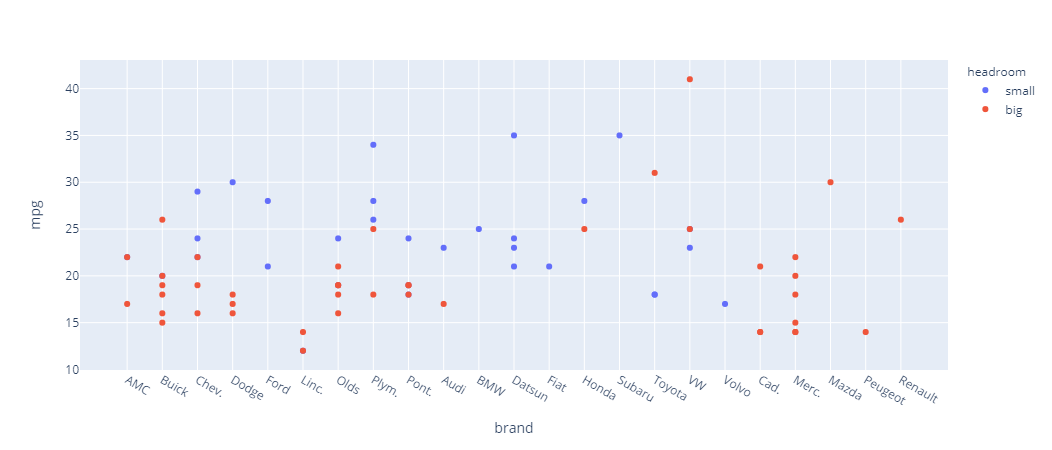

In [51]:
fig = px.scatter(df_auto, x="brand", y="mpg", color='headroom')
fig.show()

### 3D plot

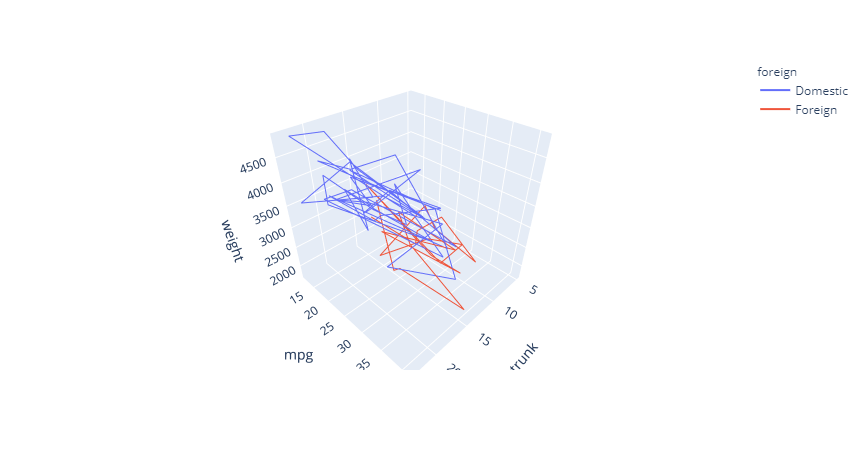

In [72]:
fig = px.line_3d(df_auto, x="trunk", y="mpg", z="weight", color="foreign")
fig.show()

### Box plot

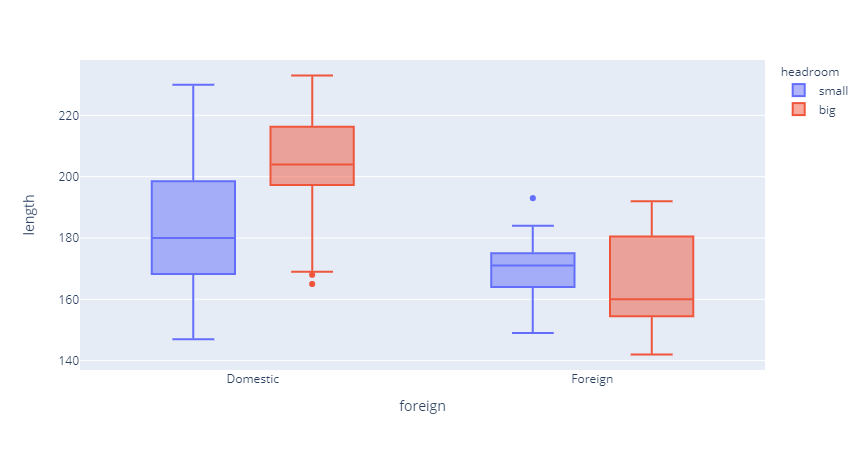

In [84]:
fig = px.box(df_auto, x="foreign", y="length", color='headroom', notched=False)
fig.show()